In [1]:
from PIL import Image

In [2]:
ourimage = Image.new('RGB', (100, 100), (255, 192, 192)) #new(mode, size, color)

In [4]:
ourimage.save('pinker.png')

In [5]:
print(Image.new.__doc__)


    Creates a new image with the given mode and size.

    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.
    


In [7]:
def newRgbImage(size, color):
    "Uses PIP's Image.New() method in RGB color mode."
    return Image.new('RGB', size, color)

newRgbImage.__doc__

"Uses PIP's Image.New() method in RGB color mode."

In [10]:
dir([])[:20]

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__']

In [18]:
polimage = newRgbImage((320, 200), (220, 20, 60))
for x in range(320):
    for y in range(100, 200):
        polimage.putpixel((x, y), (255, 255, 255))
    
polimage.save('akslop.png')

In [67]:
import random

gradient = newRgbImage((256, 256), (0, 0, 0))
for x in range(256):
    for y in range(256):
        gradient.putpixel((y, x), (random.randint(x,256), random.randint(y,255), random.randint(y-x,255)))

def decorate(image):
    for x in range(16,240):
        for y in range(16,240):
            image.putpixel((x, y), (y, x, int((x+y)/2)))
            
    for x in range(32,224,4):
        for y in range(224,32,-4):
            image.putpixel((x, y), (random.randint(min(x, y), max(x, y)), x, y))

    for x in range(64,192,-3):
        for y in range(192,64,-3):
            image.putpixel((x, y), (x, random.randint(min(x, y), max(x, y)), y))
            
    for x in range(96,160,8):
        for y in range(160,96,-8):
            image.putpixel((x, y), (x, y, random.randint(min(x, y), max(x, y))))
    
decorate(gradient)
gradient.save('grad.png')

In [106]:
new = Image.open('spongebob.png')

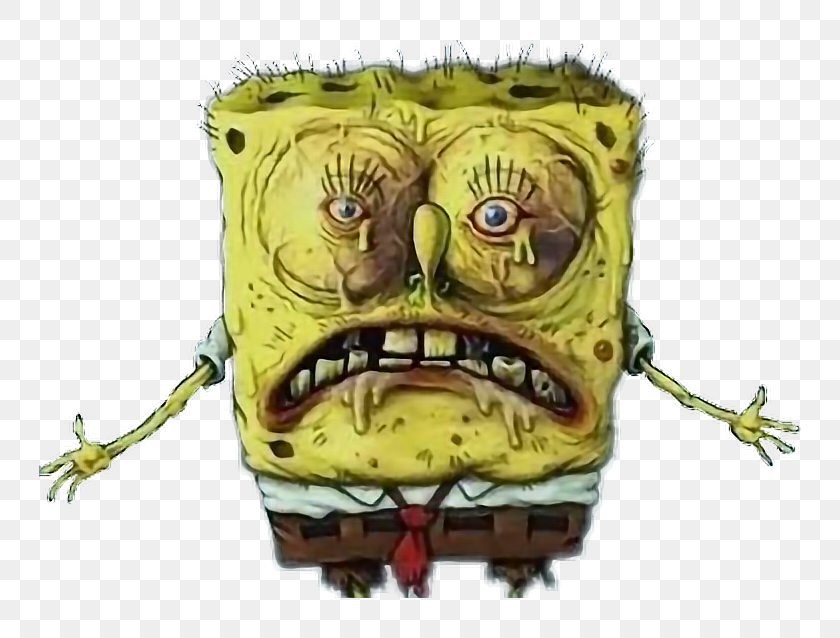

In [124]:
def modify(image, amount):
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            (r, g, b, a) = image.getpixel((x, y))
            image.putpixel((x, y), (r + amount, g + amount, b + amount))
            
def contrast(image, amount):
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            (r, g, b, a) = image.getpixel((x, y))
            if r + g + b < 328.5:
                image.putpixel((x, y), (r - amount, g - amount, b - amount))
            else:
                image.putpixel((x, y), (r + amount, g + amount, b + amount))
                
def flip(image, axis):
    w = image.size[0]
    h = image.size[1]
    if axis == 'x':
        for y in range(int(h)):
            for x in range(int(w/2)):
                left = image.getpixel((x,y))
                right = image.getpixel((w-1-x, y))
                image.putpixel((w-1-x, y), left)
                image.putpixel((x,y), right)
    elif axis == 'y':
        for x in range(int(w)):
            for y in range(int(h/2)):
                top = image.getpixel((x, y))
                bottom = image.getpixel((x, h-1-y))
                image.putpixel((x, h-1-y), top)
                image.putpixel((x,y), bottom)
    else:
        print('Only two-dimensional flipping allowed!')
            
new

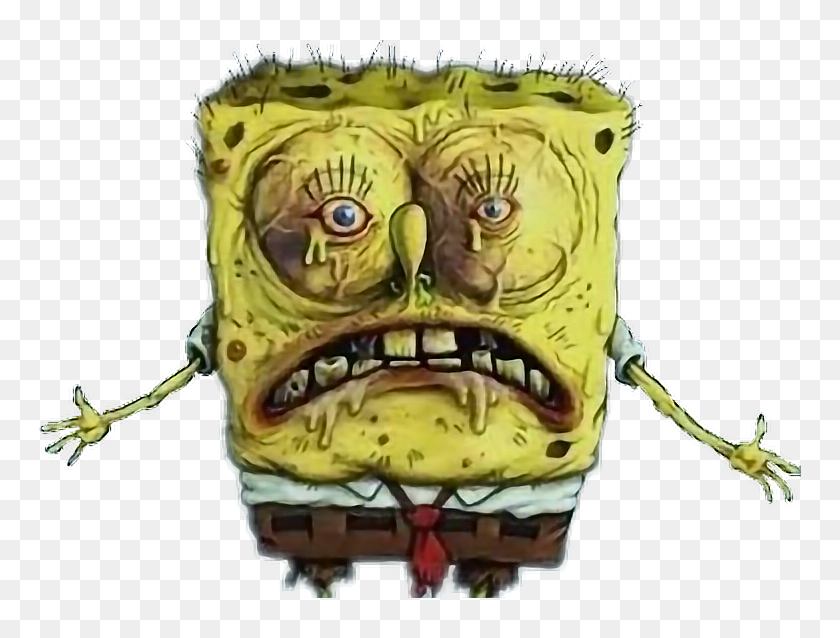

In [125]:
flip(new, 'x')
new

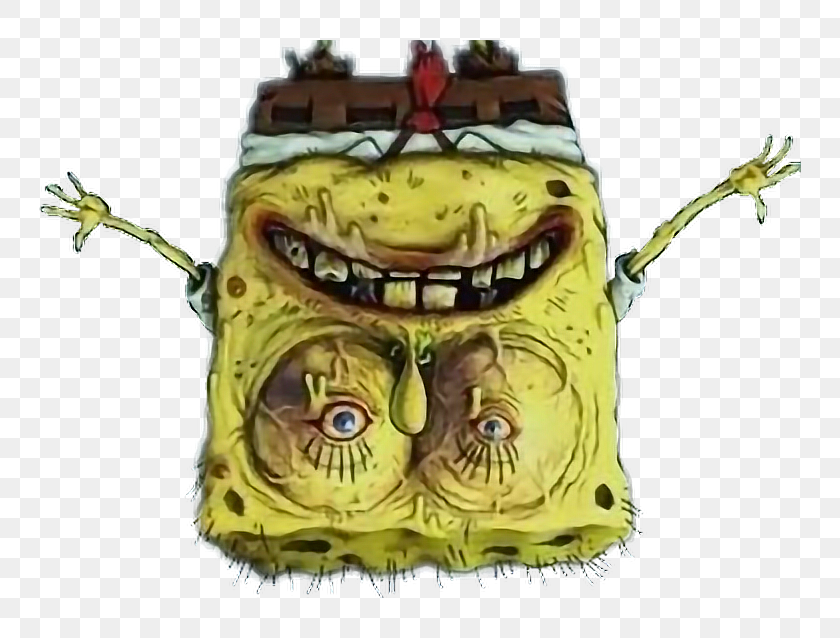

In [126]:
flip(new, 'y')
new